
# Project Melbourne Housing

Project Description: Predict the Price of the buildings in Melbourne Australia based on their features.

Jose Ramirez

# Melbourne Housing Variables

- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area
-YearBuilt

# Import Libraries

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df=pd.read_csv(r'E:\FALL SEMESTER\Fundamentals of Data Analytics\Project\Project Python\Melbourne_housing_FULL.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# Data Cleaning

- Delete the columns that are not requiered in the model.
- Delete the NaN values.
- Convert YearBuilt to AgeBuilding.
- Create dummy encoding for the columns Type, Method and RegionName

In [5]:
#Drop the unnecessary columns
df.drop(columns = {'Suburb','Address', 'Rooms', 'Type', 'Method', 'SellerG',
                   'Date', 'CouncilArea', 'Regionname', 'Propertycount'}, axis = 1, inplace = True)

In [6]:
#drop na values
df.dropna(inplace=True)

In [7]:
# Convert YearBuilt to AgeBuilding
current_year = datetime.now().year
df['AgeBuilding'] = current_year-df['YearBuilt'].astype(int)

In [8]:
df.drop('YearBuilt', axis=1, inplace=True)

In [9]:
df.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,AgeBuilding
2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,123
4,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,123
6,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,9
11,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,113
14,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,133


In [10]:
print(df)

           Price  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
2      1035000.0       2.5    3067.0       2.0       1.0  0.0     156.0   
4      1465000.0       2.5    3067.0       3.0       2.0  0.0     134.0   
6      1600000.0       2.5    3067.0       3.0       1.0  2.0     120.0   
11     1876000.0       2.5    3067.0       4.0       2.0  0.0     245.0   
14     1636000.0       2.5    3067.0       2.0       1.0  2.0     256.0   
...          ...       ...       ...       ...       ...  ...       ...   
34847   500000.0      25.5    3750.0       3.0       2.0  2.0     383.0   
34849   570000.0      25.5    3750.0       3.0       2.0  2.0     404.0   
34853   888000.0       6.3    3013.0       2.0       2.0  1.0      98.0   
34854   705000.0       6.3    3013.0       2.0       1.0  2.0     220.0   
34856  1020000.0       6.3    3013.0       2.0       1.0  0.0     250.0   

       BuildingArea  Lattitude  Longtitude  AgeBuilding  
2              79.0  -37.80790   144.9934

Export dataframe into the file modified_Regression_Dataset.csv

In [11]:
df.to_csv('modified_Regression_Dataset.csv', index = False)

# Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,AgeBuilding
count,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,-37.804501,144.991393,57.246652
std,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,0.090549,0.118919,37.040876
min,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-38.174360,144.423790,4.000000
25%,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,-37.858560,144.920000,23.000000
50%,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,-37.798700,144.998500,53.000000
75%,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,-37.748945,145.064560,78.000000
max,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,-37.407200,145.526350,827.000000


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'Lattitude'}>],
       [<AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'AgeBuilding'}>, <AxesSubplot:>]],
      dtype=object)

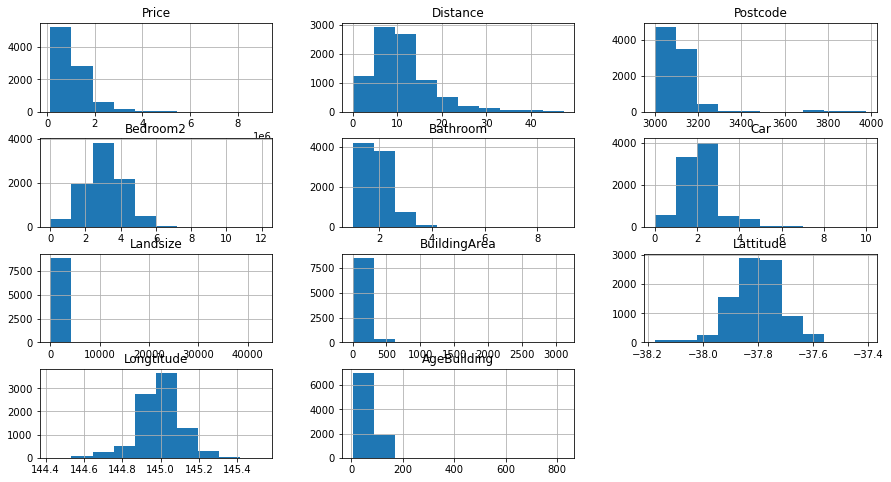

In [13]:
df.hist(figsize=(15, 8))

#### Normalization

In [14]:
df['Distance'] = np.log(df['Distance'] + 1)
df['Postcode'] = np.log(df['Postcode'] + 1)
df['Landsize'] = np.log(df['Landsize'] + 1)
df['BuildingArea'] = np.log(df['BuildingArea'] + 1)

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'Lattitude'}>],
       [<AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'AgeBuilding'}>, <AxesSubplot:>]],
      dtype=object)

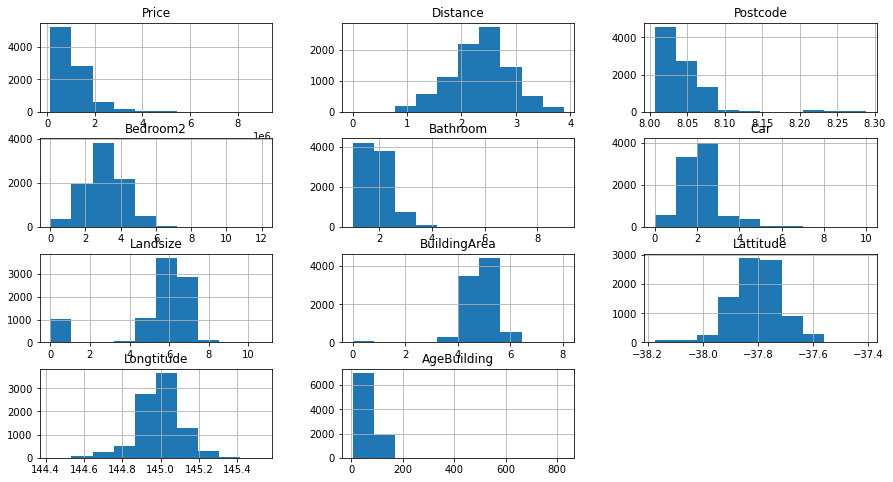

In [15]:
df.hist(figsize=(15, 8))

Boxplot - Analysis of Outliers

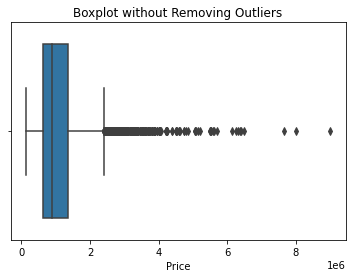

In [16]:
# Create a boxplot without removing outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot without Removing Outliers')
plt.show()

Correlation Matrix

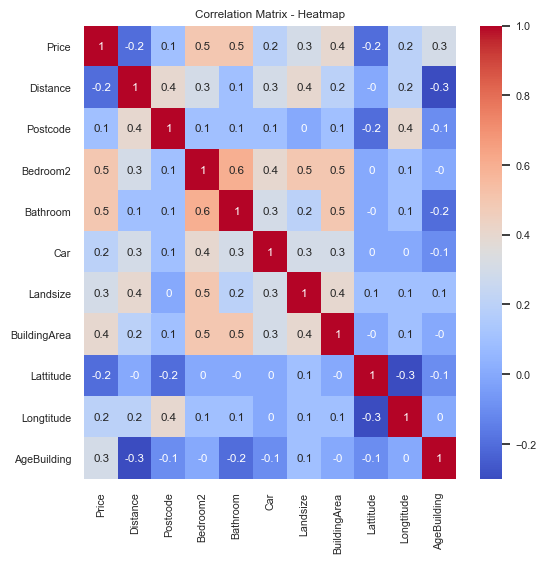

In [17]:
# Correlation Matrix
corr_matrix = df.corr().round(1)

sns.set(font_scale=0.7)

plt.figure(figsize=(6,6),dpi=100)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Heatmap')
plt.show()

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

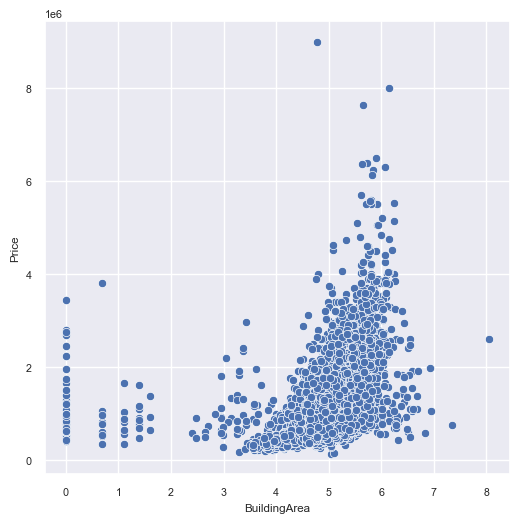

In [18]:
plt.figure(figsize=(6,6),dpi=100)
sns.scatterplot(x=df['BuildingArea'], y=df['Price'])

#### Preparing the dataset and Feature Scaling

In [19]:
features = df.drop("Price",axis=1)
response = df["Price"]

In [20]:
#Feature scaling using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(features)

In [21]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

In [22]:
# Split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(housing_num_min_max_scaled, 
                                                    response, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
# get the predictions for the test dataset
predictions_lr = model_lr.predict(X_test)

#### Calculate the performance metric

In [25]:
r2_train = model_lr.score(X_train,Y_train)
print ("R^2 in Training Set: ", r2_train)

r2_test = model_lr.score(X_test,Y_test)
print ("R^2 in Test Set is: ", r2_test)

R^2 in Training Set:  0.5613764739459174
R^2 in Test Set is:  0.5997601617350488


In [26]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, predictions_lr)**0.5

print ('RMSE is: \n', rmse)

RMSE is: 
 392143.72119057097


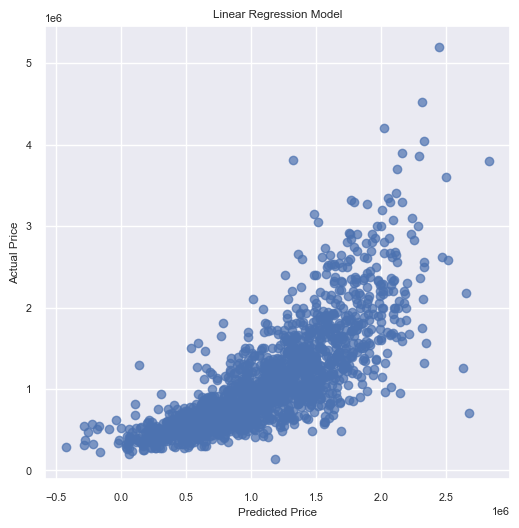

In [27]:
actual_values = Y_test
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(predictions_lr, actual_values, alpha=.7, color='b') 

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
features = df.drop("Price",axis=1)
response = df["Price"]

In [30]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(housing_num_min_max_scaled, response, test_size=0.2, random_state=42)

In [31]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Make predictions on the test set
predictions_rf = rf_regressor.predict(X_test)

In [34]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

r2_train = rf_regressor.score(X_train,Y_train)
print ("R^2 in Training Set: ", r2_train)

r2_test = rf_regressor.score(X_test,Y_test)
print ("R^2 in Test Set is: ", r2_test)

R^2 in Training Set:  0.9715980620825022
R^2 in Test Set is:  0.8382991069502059


In [35]:
mse = mean_squared_error(y_test, predictions_rf)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 62127322247.15614


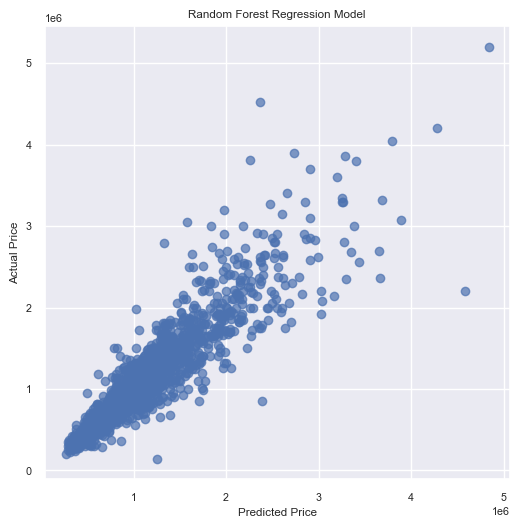

In [36]:
actual_values = y_test
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(predictions_rf, actual_values, alpha=.7, color='b')

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Regression Model')
plt.show()

### Features importance

In [37]:
rf_regressor.feature_importances_

array([0.15873733, 0.08456972, 0.01874503, 0.01609953, 0.01004654,
       0.07311255, 0.36890597, 0.07914913, 0.06589535, 0.12473886])

In [38]:
feature_names = df.columns.tolist()
print(feature_names)

['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'AgeBuilding']


In [39]:
# Get feature importances
importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

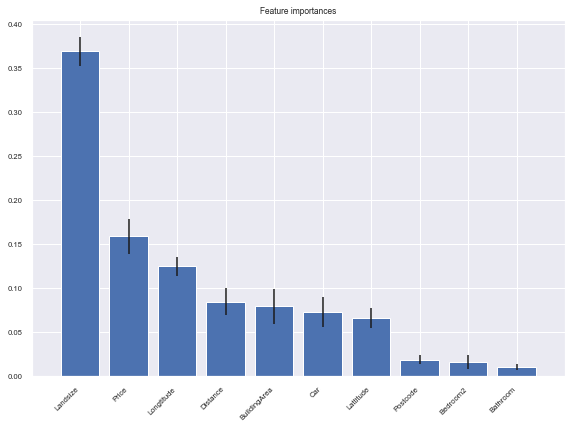

In [40]:
# Plot feature importances with names
plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')  # Feature names added
plt.xlim([-1, features.shape[1]])
plt.tight_layout()
plt.show()

## Predictions using Random Forest Regression

In [41]:
#new data with dropped columns
#Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, 
        #BuildingArea, Lattitude, Longtitude, AgeBuilding

new_data = [
    [3.3, 3206, 4, 2, 1, 330, 207, -37.8477, 144.9558, 5],
    [18, 3037, 3, 2, 1, 453, 153, -37.68811, 144.75, 103],
    [5.9, 3032, 1, 1, 1, 0, 58, -37.7723, 144.9094, 51]
]

In [42]:
#Scaling the new data, using the same MinMax Scaler from the original dataset
new_data_scaled = min_max_scaler.transform(new_data)

In [43]:
# Predict prices for scaled new data
predicted_prices = rf_regressor.predict(new_data_scaled)
print("Predicted prices for new data:")
for i, price in enumerate(predicted_prices):
    print(f"Predicted Price {i+1}: ${price:,.0f}")

Predicted prices for new data:
Predicted Price 1: $2,448,955
Predicted Price 2: $1,413,530
Predicted Price 3: $1,298,934
